<a href="https://colab.research.google.com/github/Akhil-Krishna/Deep-Learning-Tutorial/blob/main/RecommendationEngine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Recommendation Engine**

## Creating Synthetic Dataset of Students in GuiD

In [3]:
import csv
import random

def generate_student_data(name):
    data = [name]
    scores, times, attempts = [], [], []
    max_stage=random.randint(1,9)

    for stage in range(1, 9):
        if stage <= max_stage:
            score = random.choice([0] + list(range(25, 51)))  # 0 or 25-50
            time = 0 if score == 0 else random.randint(40, 120)
            attempt = 0 if score == 0 else random.randint(1, 5)
        else:
            score, time, attempt = 0, 0, 0

        scores.append(score)
        times.append(time)
        attempts.append(attempt)
        data.extend([score, time, attempt])

    # Determine suggestion based on minimum score, then max attempts, then min time
    min_stage = min((i for i in range(8) if scores[i] > 0), key=lambda i: (scores[i], -attempts[i], times[i]), default=0)
    suggestion = f's{min_stage + 1}'

    data.append(suggestion)
    return data

def generate_csv(filename, num_students=1500):
    headers = ["name"]
    for stage in range(1, 9):
        headers.extend([f"s{stage}_score", f"s{stage}_time", f"s{stage}_attempts"])
    headers.append("Suggestion")

    students = [generate_student_data(f"student{i}") for i in range(1, num_students + 1)]

    with open(filename, "w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(headers)
        writer.writerows(students)

    print(f"CSV file '{filename}' created successfully!")

generate_csv("students_1500.csv", num_students=1500)


CSV file 'students_1500.csv' created successfully!


## Creating RecommendationEngineNew.h5 Model

**Deep Neural Network** is used for developing this Recommendation Engine with the help of tensorflow.keras

In [4]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv("students_1500.csv")


df.drop(columns=['name'], inplace=True)
encoder = LabelEncoder()
df['Suggestion'] = encoder.fit_transform(df['Suggestion'])

X = df.drop(columns=['Suggestion']).values
y = tf.keras.utils.to_categorical(df['Suggestion'], num_classes=len(encoder.classes_))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#nn
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(len(encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=75, batch_size=32, validation_data=(X_test, y_test))

# Save the model
model.save('RecommendationEngineNew.h5')

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

print("Model training complete! Use 'predict_suggestion' to test new data.")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/75
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2198 - loss: 5.0640 - val_accuracy: 0.3067 - val_loss: 1.7514
Epoch 2/75
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3505 - loss: 1.7065 - val_accuracy: 0.3200 - val_loss: 1.5929
Epoch 3/75
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3148 - loss: 1.6111 - val_accuracy: 0.3433 - val_loss: 1.5406
Epoch 4/75
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3319 - loss: 1.5383 - val_accuracy: 0.3500 - val_loss: 1.4930
Epoch 5/75
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3479 - loss: 1.5165 - val_accuracy: 0.3900 - val_loss: 1.4760
Epoch 6/75
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3767 - loss: 1.4702 - val_accuracy: 0.3733 - val_loss: 1.4510
Epoch 7/75
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3911 - loss: 1.4260 - val_accuracy: 0.4067 - val_loss: 1.4271
Epoch 8/75
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4227 - loss: 1.3923 - val_accuracy: 0.3900 - val_loss

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6813 - loss: 1.2621 
Test Accuracy: 70.00%
Model training complete! Use 'predict_suggestion' to test new data.


## Plotting Graphs of Loss and accuracy

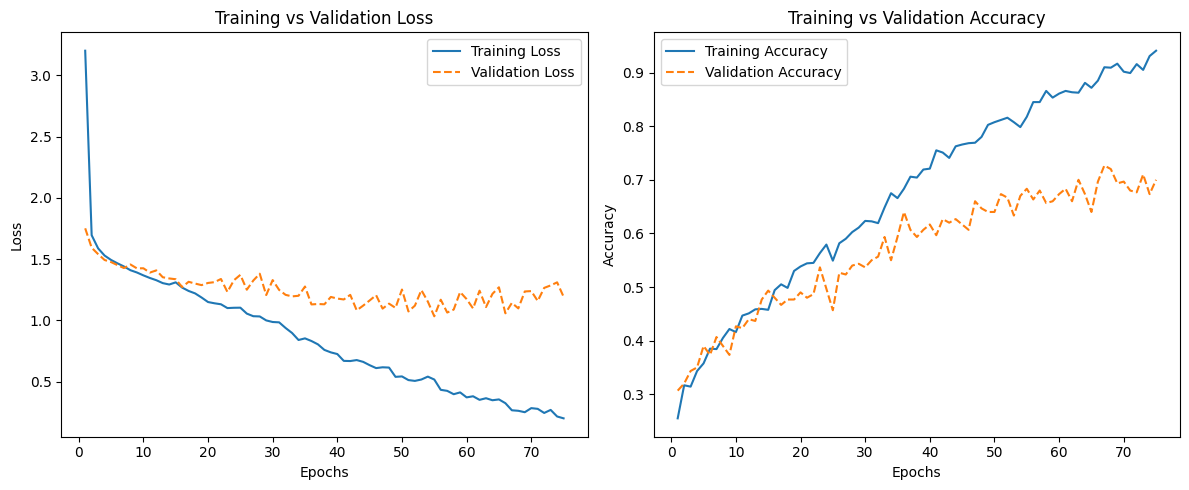

In [5]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs_range = range(1, len(loss) + 1)

# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


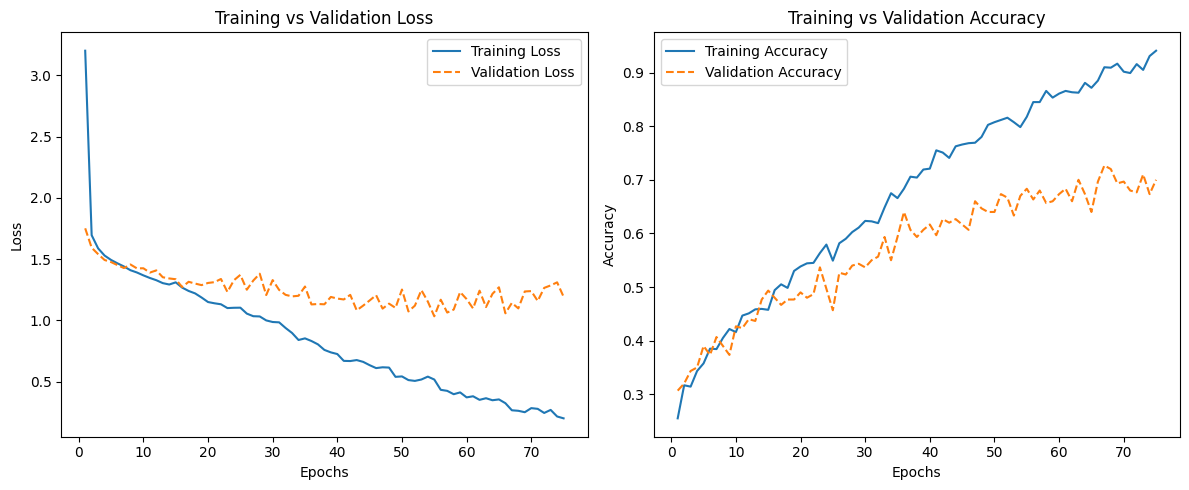



**Graph as a Result of Recommendation Engine**

## Prediction Function


In [6]:
import tensorflow as tf
import json
import os
import numpy as np
def predict(input_data):
    """
    Predicts the semester suggestion based on student scores.
     :param data: List of student features (excluding name).
     :return: Predicted semester suggestion.
     """
    model = tf.keras.models.load_model('RecommendationEngineNew.h5')
    sample=np.array(input_data)
    sample = sample.reshape(1,24)
    pred=model.predict(sample)
    sem=np.argmax(pred)+1

    result=  f'Semester{sem}'
    return result

# Test function if run directly
if __name__ == "__main__":
    test_data = [43,100,2,42,100,2,46,67,3,46,102,1,45,60,3,46,110,1,25,50,6,45,102,2]
    result = predict(test_data)
    print(json.dumps(result))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
"Semester7"


# **Report**



# **Personalized Course Recommendation Engine**  

## **Introduction**  
The **Personalized Course Recommendation Engine** is an intelligent system integrated into the GuiD platform, designed to suggest the most relevant courses based on a user’s progress. The recommendation engine analyzes multiple factors such as **scores, time spent on each stage, and the number of attempts**, allowing it to provide a tailored learning path. By guiding students towards the right courses at the right time, this feature enhances their overall learning experience and ensures they stay on track for academic and professional success.  

## **How It Works**  
The recommendation system is powered by **data-driven insights** that evaluate a student's journey through different learning stages (S1–S8). The model collects and processes the following key metrics:  

- **Assessment Scores** – Performance in quizzes and tests.  
- **Time Spent** – Duration spent on completing each stage.  
- **Number of Attempts** – Frequency of test retakes, indicating difficulty level.  

This data is processed through a **machine learning-based prediction model**, which evaluates user performance and predicts the most suitable stage. Based on the predicted stage (Semester 1–8), the system recommends a set of courses aligned with the user’s needs.  

## **Caching Mechanism for Efficiency**  
To ensure smooth operation and avoid redundant computations, the engine incorporates a **caching mechanism** that stores previous recommendations. When a user revisits their profile, the system first checks for existing recommendations in the cache. If none are found, it computes new recommendations and updates the cache for future use.  

## **Performance Evaluation**  
To assess the model’s effectiveness, we track two key performance indicators:  

1. **Training vs. Validation Loss** (Left Graph)  
   - This graph showcases how the model’s error rate evolves over time. The **training loss** continuously decreases, indicating that the model is learning effectively. However, the **validation loss fluctuates**, suggesting some variance, which may be due to unseen data complexity.  

2. **Training vs. Validation Accuracy** (Right Graph)  
   - The training accuracy steadily improves, demonstrating that the model is learning patterns well. The validation accuracy, though slightly lower, remains relatively stable. This suggests that the model generalizes well but could benefit from fine-tuning to reduce overfitting.  

## **User Experience & Future Enhancements**  
To make navigation seamless, the recommended courses are displayed on the user’s profile page along with a **"Review Courses"** button. Clicking this button directs the user to the **Roadmap** section, where they can enroll in suggested courses.  

Future improvements include:  
✅ Fine-tuning the prediction model for **higher validation accuracy**.  
✅ Implementing **adaptive learning paths** that adjust dynamically based on real-time performance.  
✅ Storing **historical predictions** to analyze trends and improve recommendation accuracy.  

By leveraging AI-driven recommendations, the GuiD platform ensures that students receive a **personalized and structured** learning experience, helping them advance in their academic journey efficiently.  

